In [23]:
import cv2
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import random


Time step 1:
Current State: 0
Chosen Action: 0
Reward: 0.0


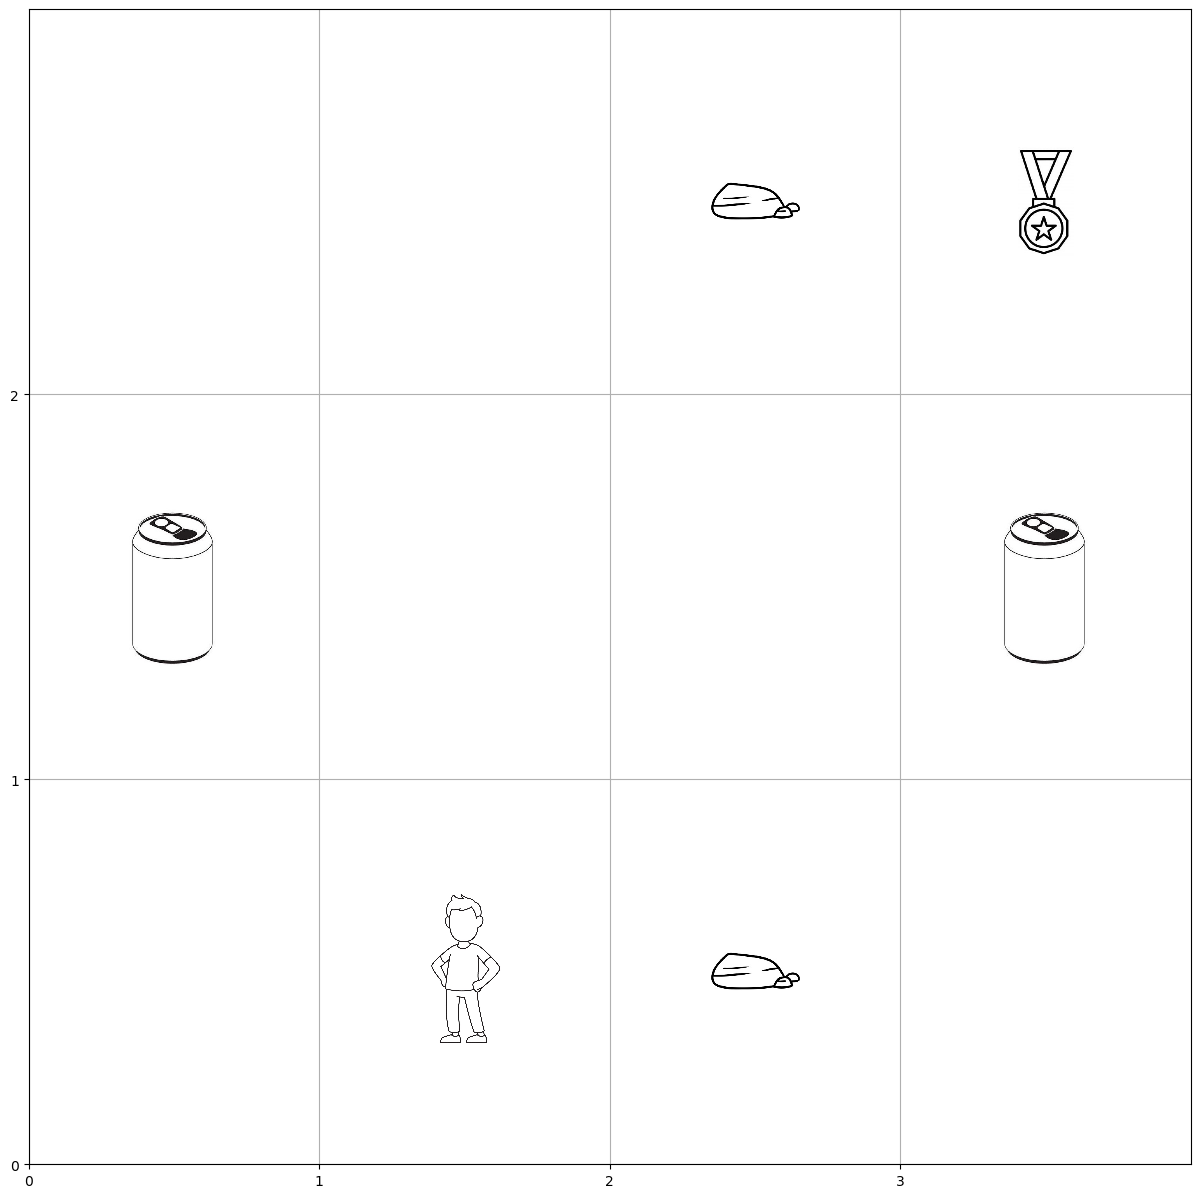

Time step 2:
Current State: 0
Chosen Action: 0
Reward: -2.0


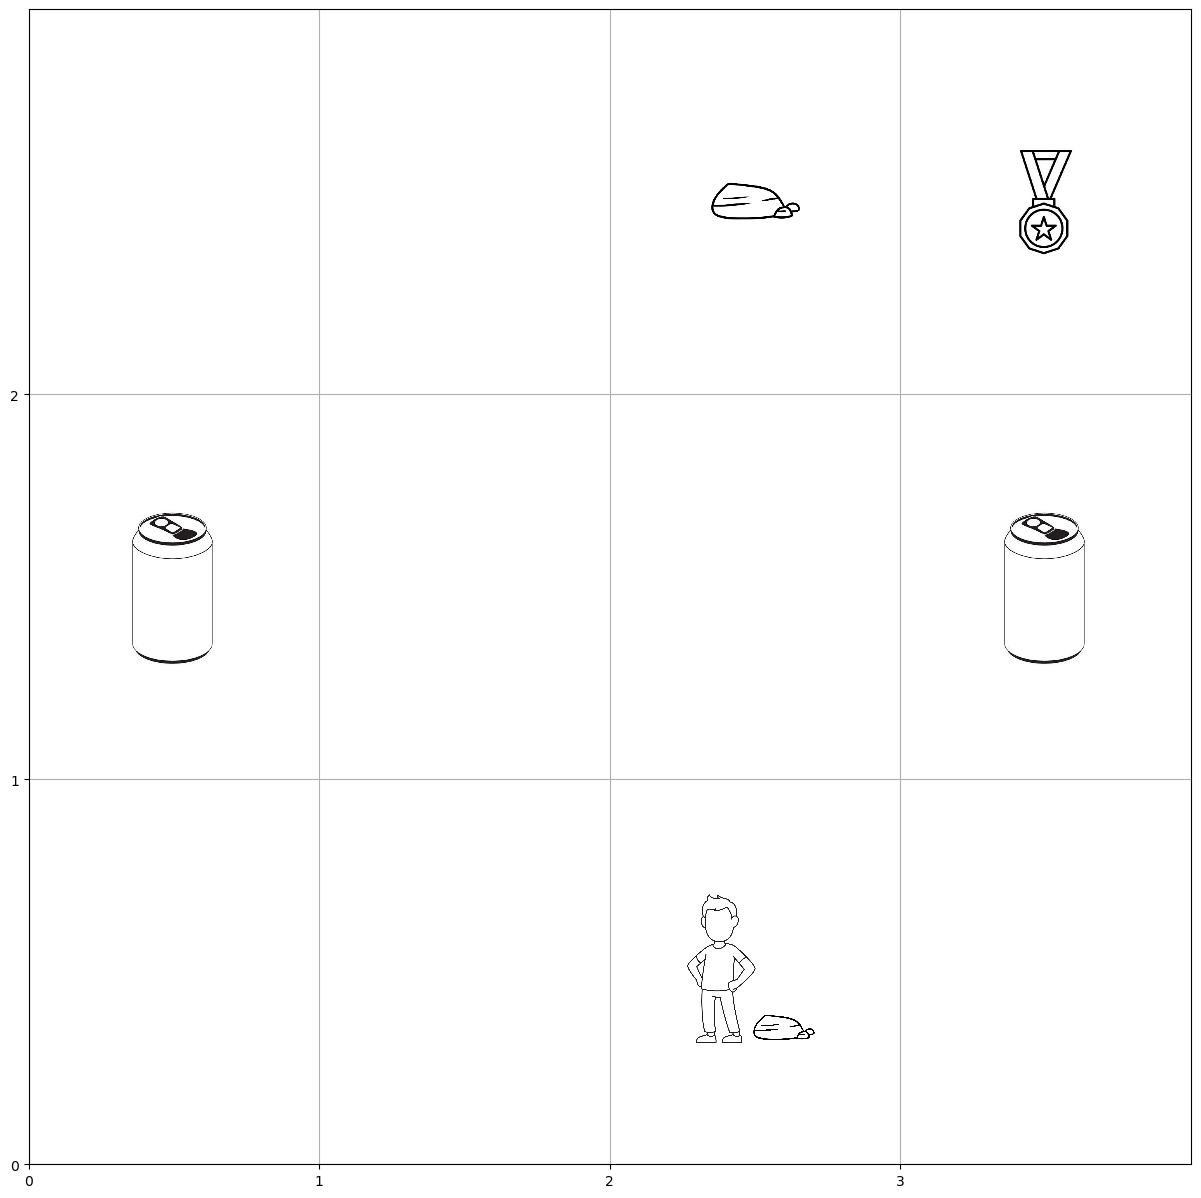

Time step 3:
Current State: 0
Chosen Action: 0
Reward: -2.0


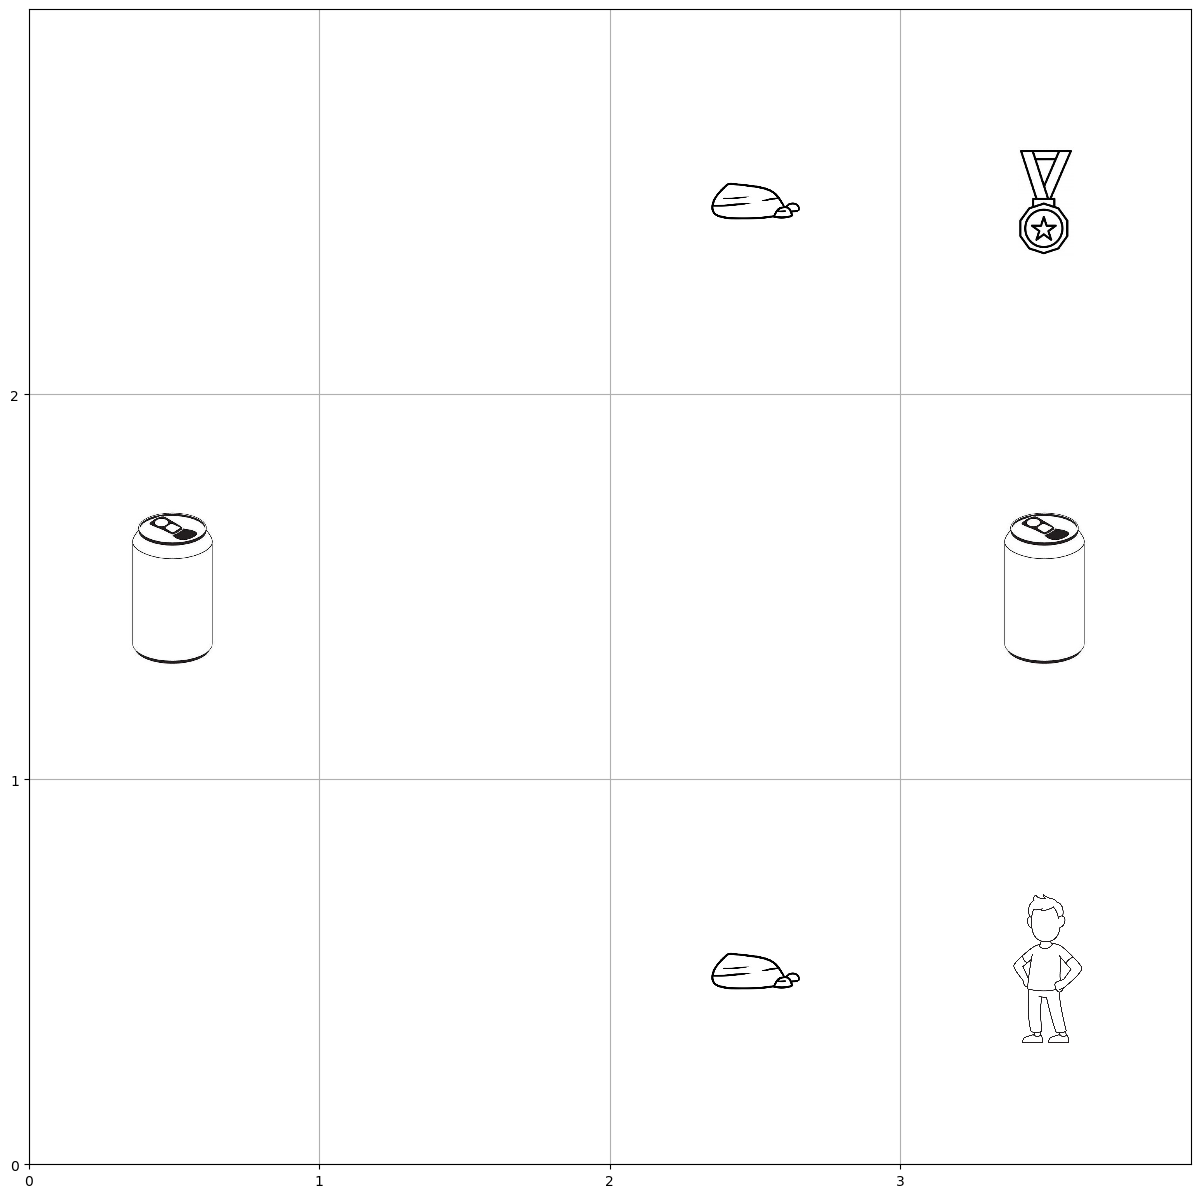

Time step 4:
Current State: 0
Chosen Action: 0
Reward: -2.0


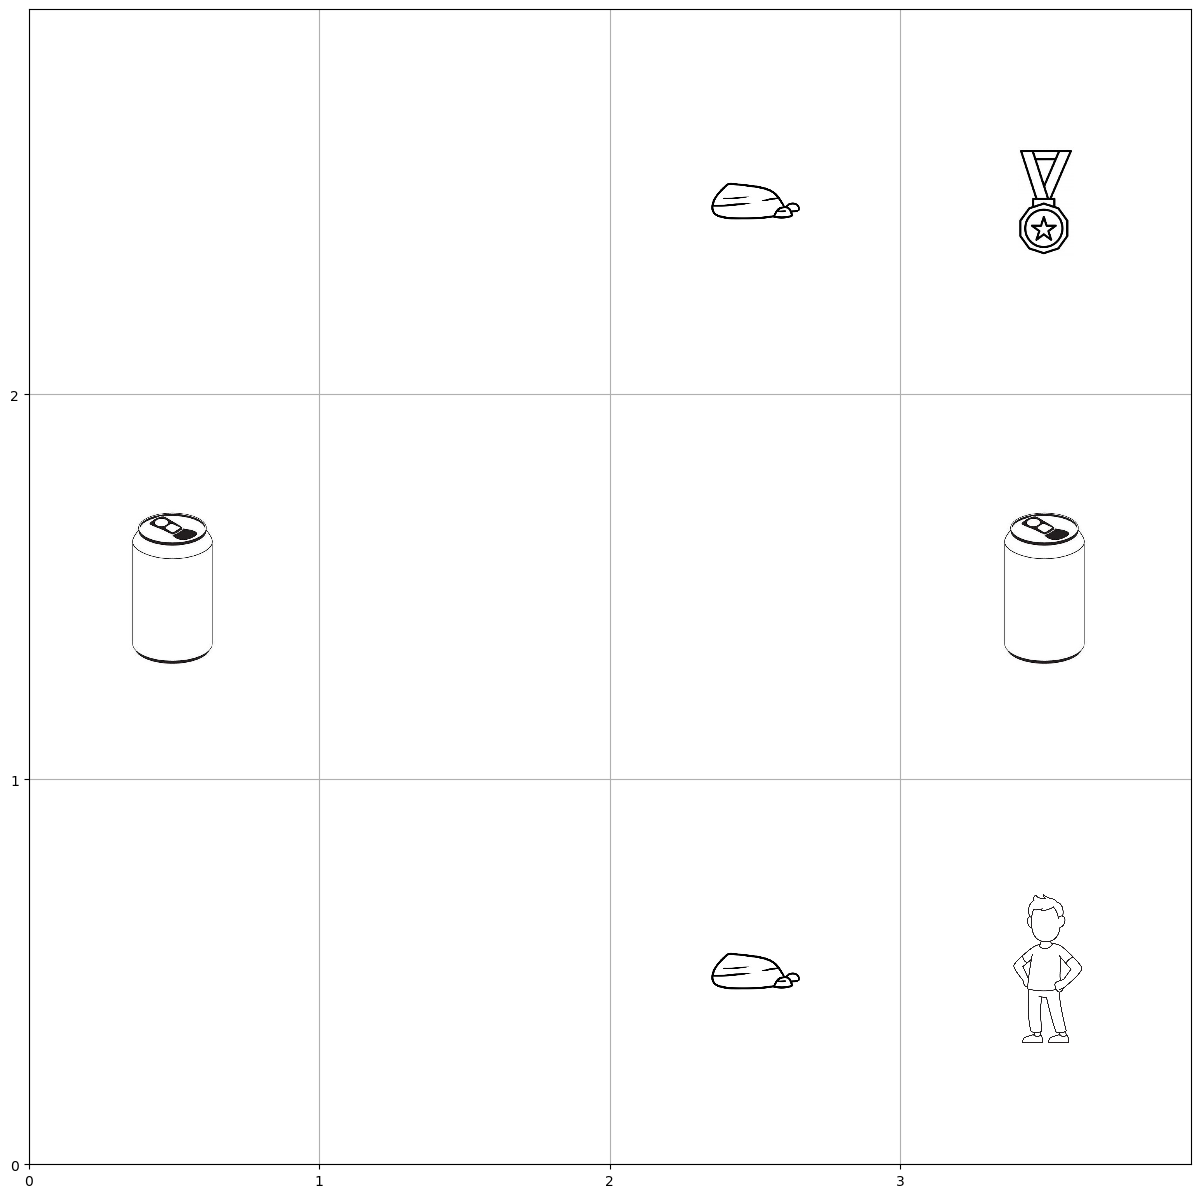

Time step 5:
Current State: 0
Chosen Action: 3
Reward: -2.0


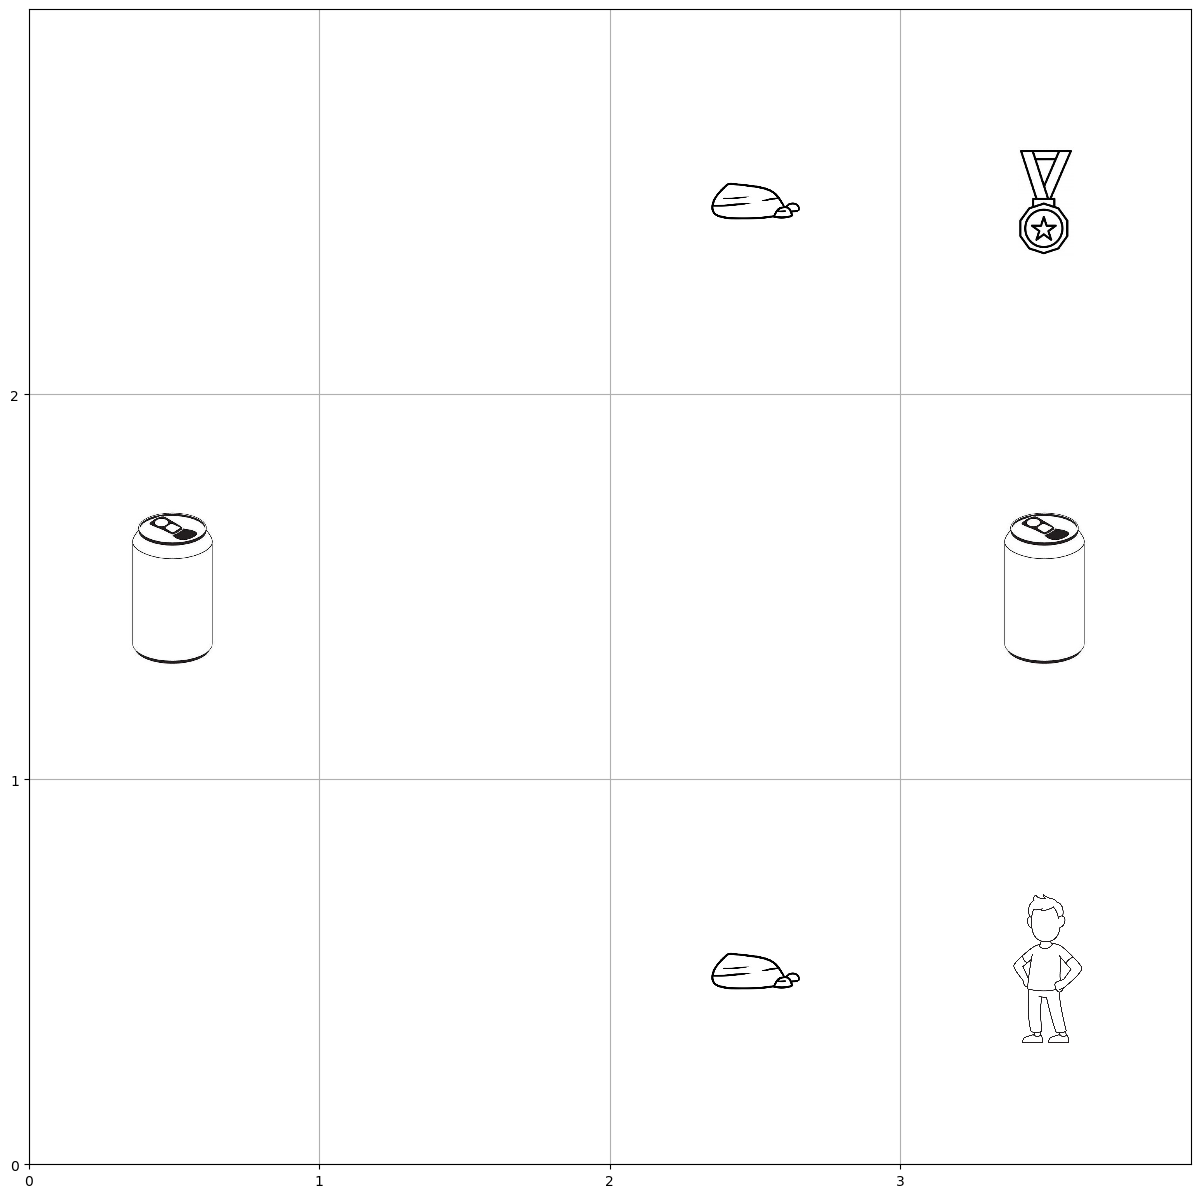

Time step 6:
Current State: 0
Chosen Action: 0
Reward: -2.0


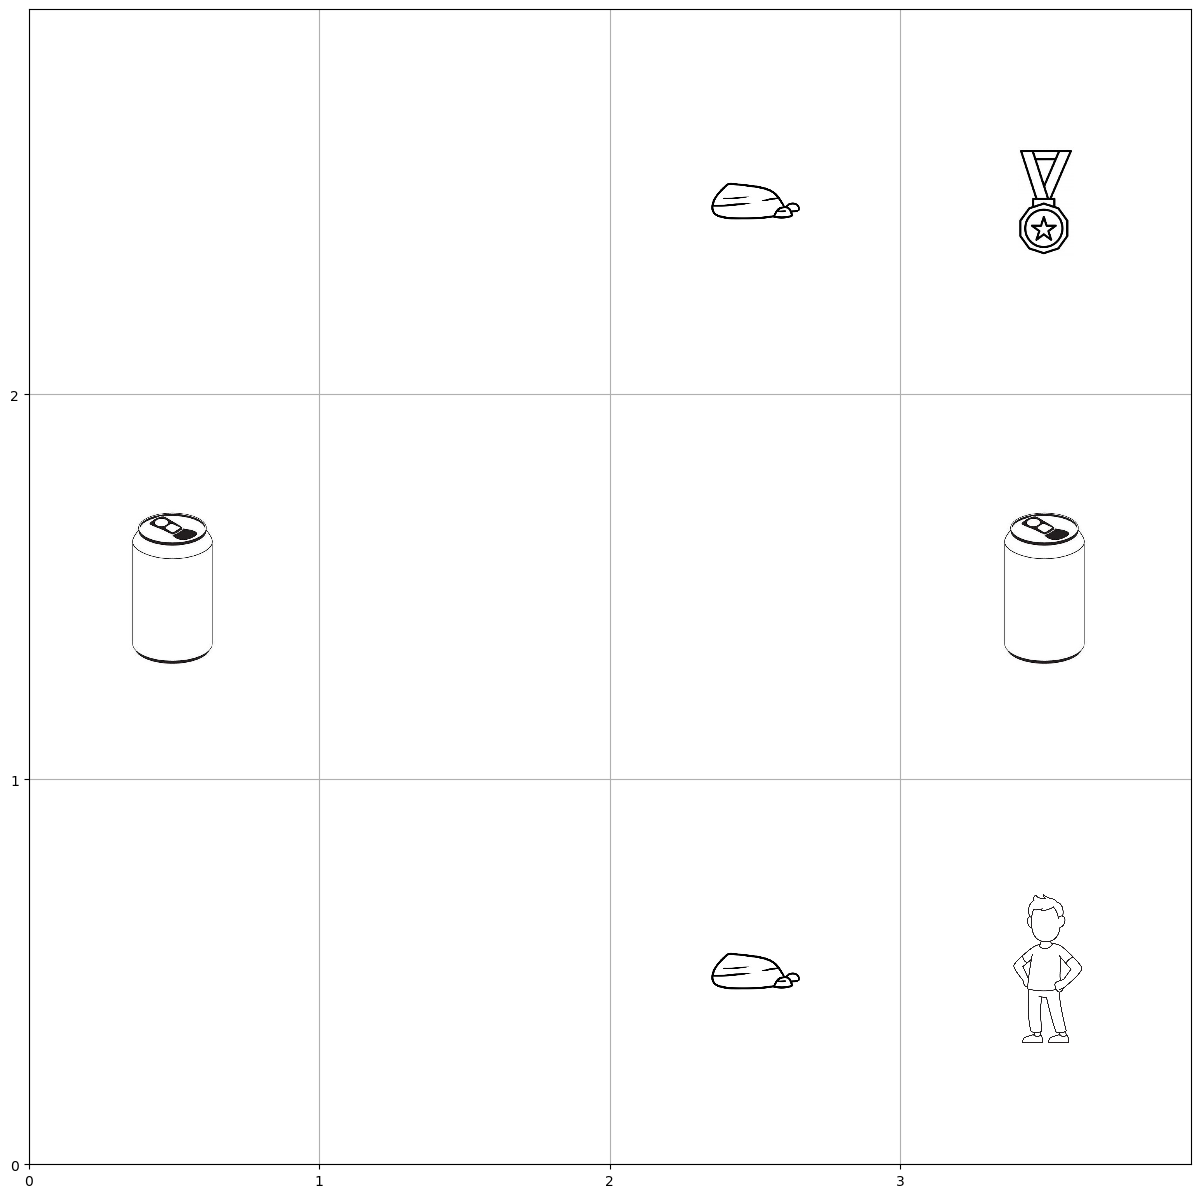

Time step 7:
Current State: 0
Chosen Action: 3
Reward: -2.0


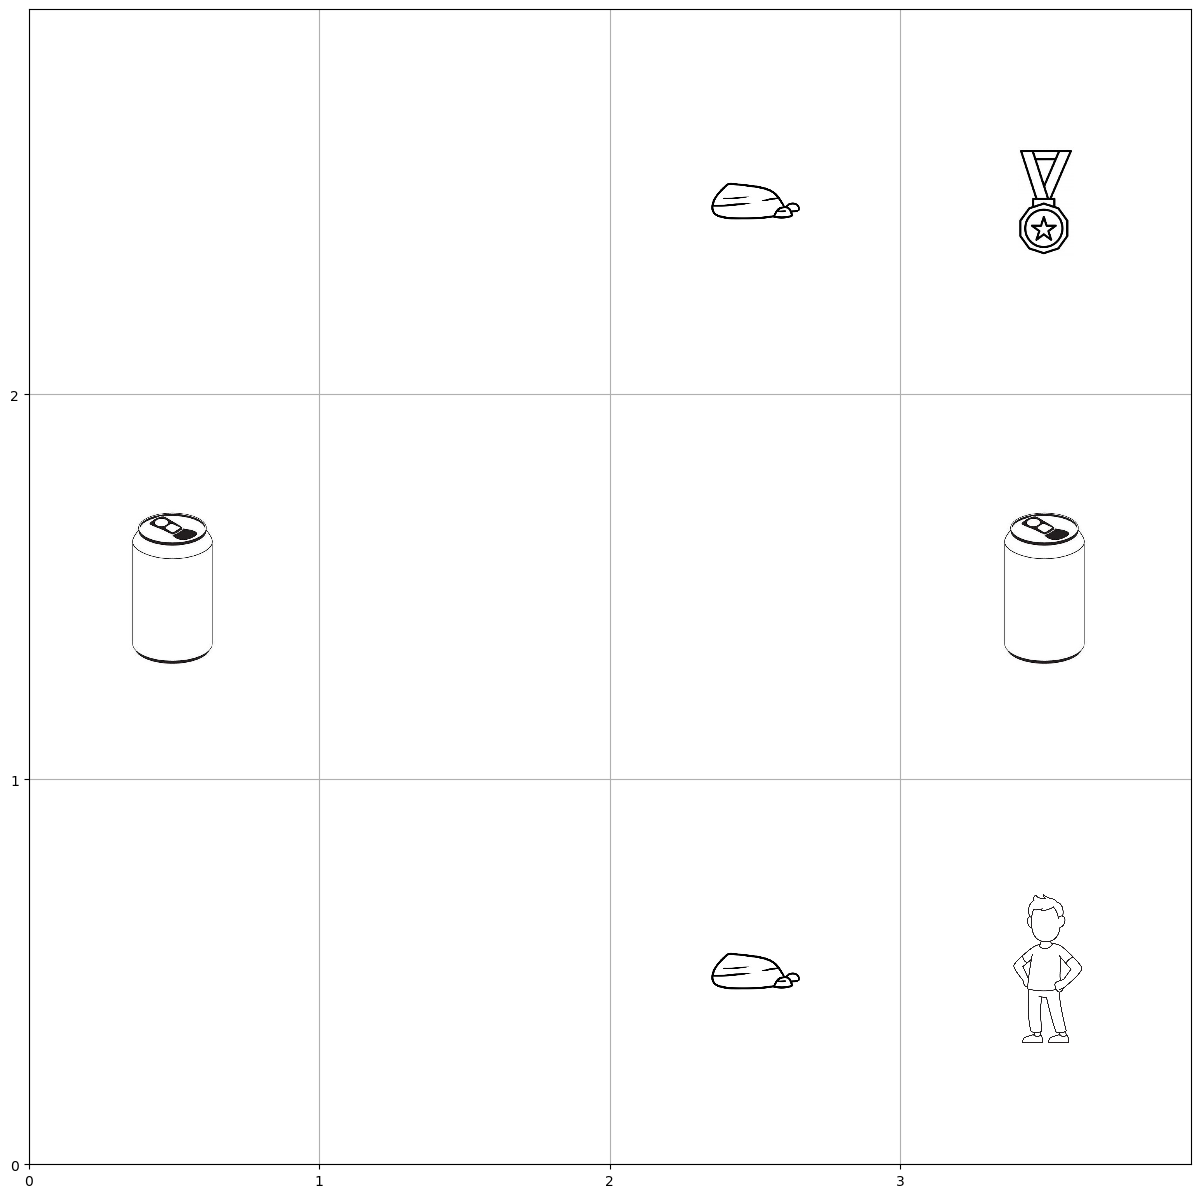

Time step 8:
Current State: 0
Chosen Action: 2
Reward: 3.0


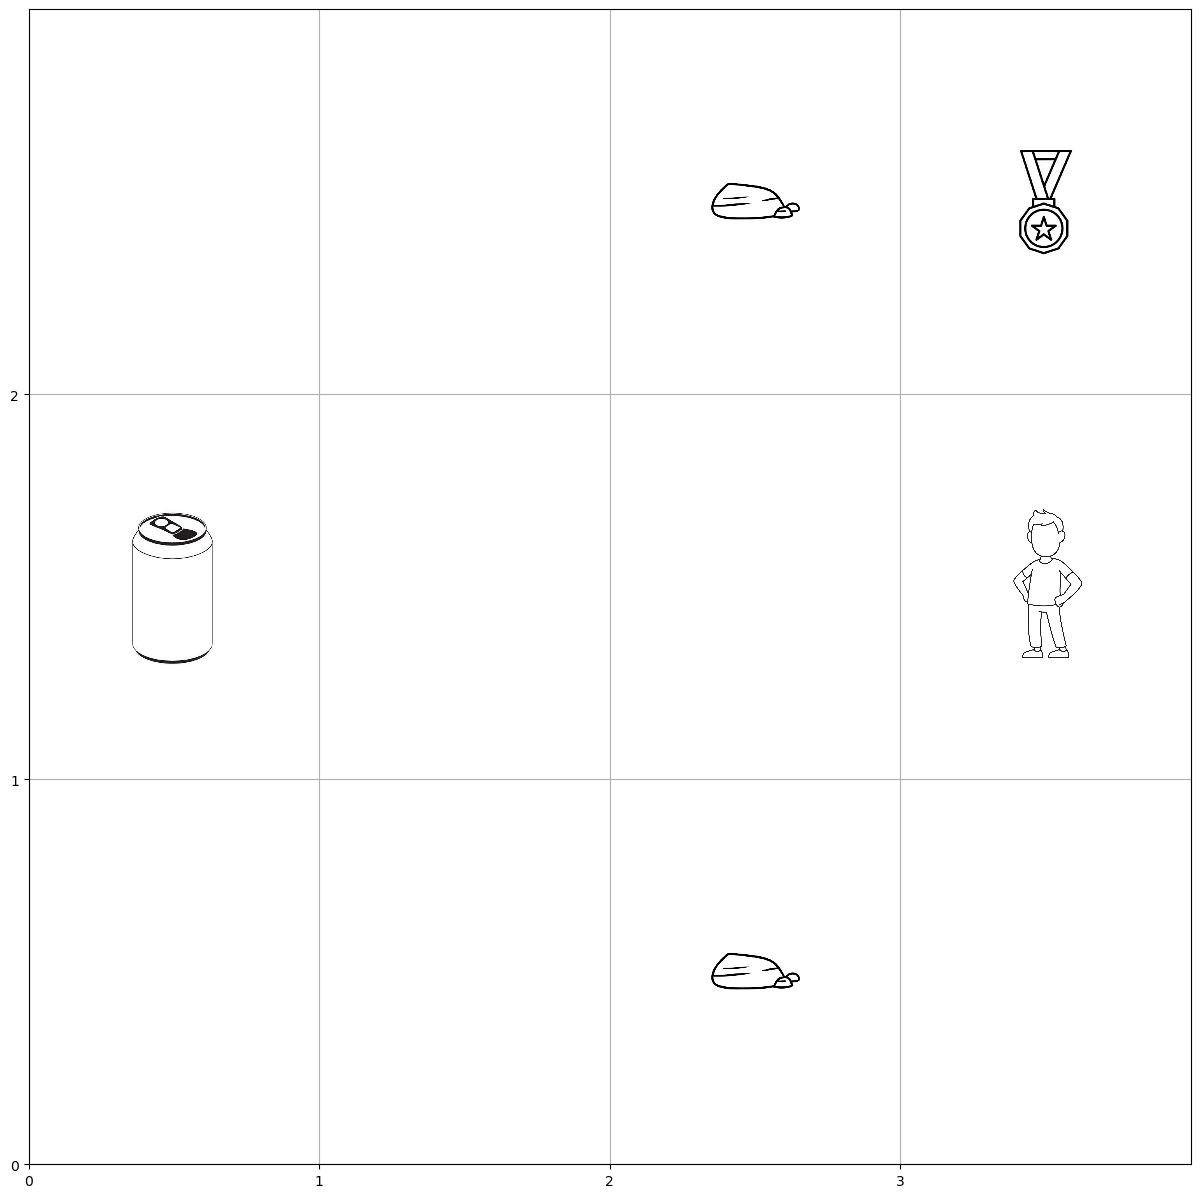

Time step 9:
Current State: 0
Chosen Action: 2
Reward: 13.0


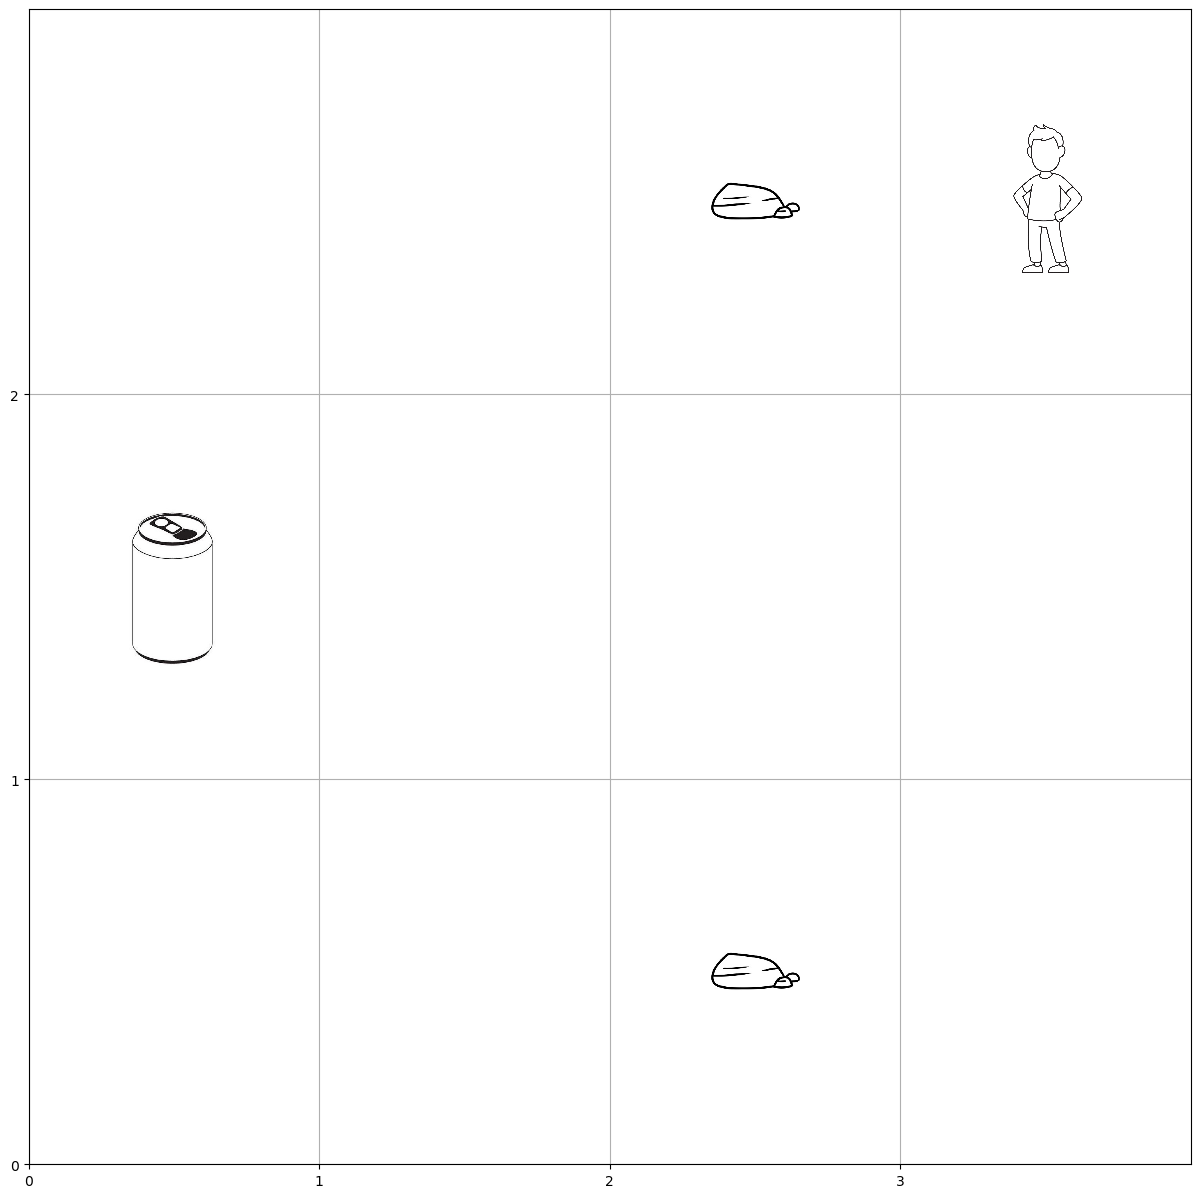

Time step 10:
Current State: 0
Chosen Action: 2
Reward: 23.0


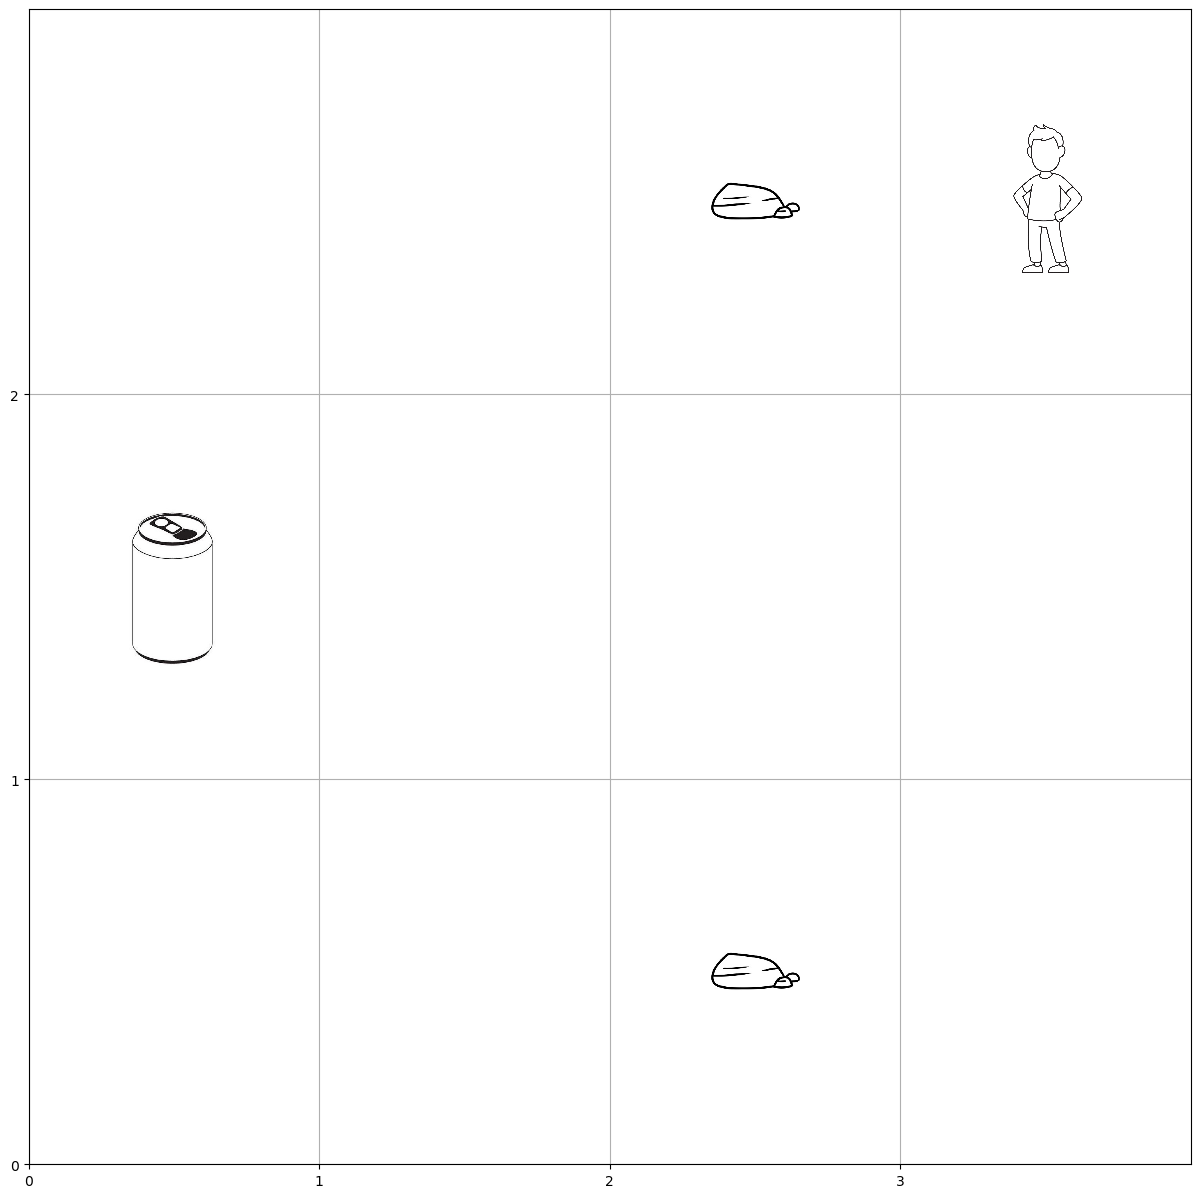

Time step 11:
Current State: 0
Chosen Action: 3
Reward: 23.0


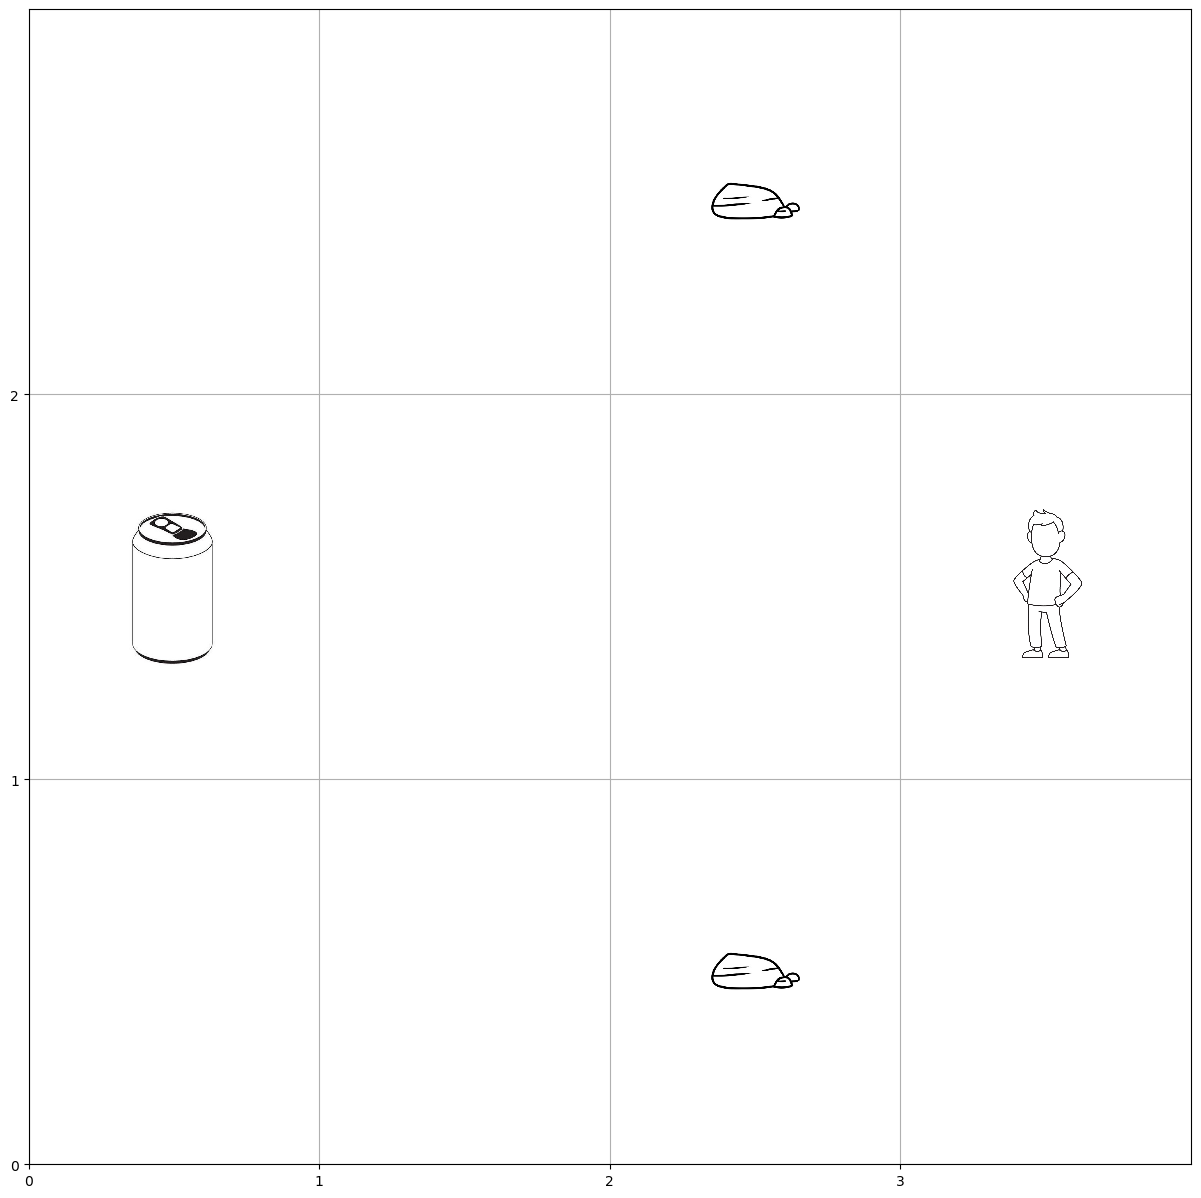

In [25]:
class MarathonEnvironment(gym.Env):

    def __init__(self, environment_type):
        
        self.environment_type = environment_type

        self.environment_width = 4
        self.environment_height = 3

        self.observation_space = spaces.Discrete(self.environment_width * self.environment_height)
        self.action_space = spaces.Discrete(4)

        self.agent_pos = np.asarray([0, 0])
        self.drink_pos = np.asarray([[3, 1],[0,1]])
        self.medal_pos = np.asarray([3, 2])
        self.medal_quantity = 1
        self.stone_pos = np.asarray([[2,0],[2,2]])
        self.current_state = 0

        self.reward_medal = 10.0
        self.reward_drink = 5.0
        self.penalty_stone = -2.0
    
    def reset(self):
       
        self.current_state=0
        return self.current_state
    
    def step(self, action):
         

         max_x = self.environment_width - 1
         max_y = self.environment_height - 1
         reward = 0.0

         if action == 0 and self.agent_pos[0] < max_x:

            self.agent_pos[0] += 1  # Move right
         elif action == 1 and self.agent_pos[0] > 0:

            self.agent_pos[0] -= 1  # Move left

         elif action == 2 and self.agent_pos[1] < max_y:

            self.agent_pos[1] += 1  # Move up
         elif action == 3 and self.agent_pos[1] > 0:

            self.agent_pos[1] -= 1  # Move down

        
         self.agent_pos[0] = max(0, min(self.agent_pos[0], max_x))
         self.agent_pos[1] = max(0, min(self.agent_pos[1], max_y))

         if np.array_equal(self.agent_pos, self.medal_pos):
            reward += self.reward_medal
            self.medal_quantity -= 1

   
         for drink_index, drink_pos in enumerate(self.drink_pos):

            if np.array_equal(self.agent_pos, drink_pos):

                reward += self.reward_drink
                self.drink_pos = np.delete(self.drink_pos, drink_index, axis=0)  
                break  


         if any(np.array_equal(self.agent_pos, self.stone_pos[i]) for i in range(len(self.stone_pos))):
            reward += self.penalty_stone
         done = self.medal_quantity == 0 

        
         return self.current_state, reward, done, {}
    
    def render(self, mode='human', plot=False):
       

        fig, ax = plt.subplots(figsize=(15, 15))
        ax.set_xlim(0, 4)
        ax.set_ylim(0, 3)

        def plot_image(plot_pos):
            

           
            plot_agent, plot_stone, plot_medal, plot_drink = \
                False, False, False, False

            
            if np.array_equal(self.agent_pos, plot_pos):
                plot_agent = True
            if any(np.array_equal(self.stone_pos[i], plot_pos) for i in range(len(self.stone_pos))):
                plot_stone = True
            if self.medal_quantity > 0:  
                if np.array_equal(plot_pos, self.medal_pos):
                    plot_medal = True
            if any(np.array_equal(self.drink_pos[i], plot_pos) for i in range(len(self.drink_pos))):
                plot_drink = True
           
            
            if plot_agent and \
                    all(not item for item in
                        [plot_drink, plot_medal, plot_stone]):
                agent = AnnotationBbox(OffsetImage(plt.imread('images/man.jpg'), zoom=0.1),
                                       np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(agent)

           
            elif plot_stone and \
                    all(not item for item in
                        [plot_agent, plot_drink, plot_medal]):
                stone = AnnotationBbox(OffsetImage(plt.imread('images/stone.jpg'), zoom=0.28),
                                        np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(stone)

           
            elif plot_drink and \
                    all(not item for item in
                        [plot_agent, plot_medal, plot_stone]):
                drink = AnnotationBbox(OffsetImage(plt.imread('images/energydrink.jpeg'), zoom=0.28),
                                      np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(drink)

           
            elif plot_medal and \
                    all(not item for item in
                        [plot_agent, plot_stone, plot_drink]):
                medal = AnnotationBbox(OffsetImage(plt.imread('images/medal.jpeg'), zoom=0.28),
                                     np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(medal)

            
            elif all(item for item in [plot_agent, plot_stone]) and \
                    all(not item for item in
                        [plot_medal, plot_drink]):
                agent_stone = AnnotationBbox(OffsetImage(plt.imread('images/man-stone.jpg'), zoom=0.1),
                                              np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(agent_stone)

            
            elif all(item for item in [plot_agent, plot_drink]) and \
                    all(not item for item in
                        [plot_medal, plot_stone]):
                agent_drink = AnnotationBbox(OffsetImage(plt.imread('images/man-drink.png'), zoom=0.1),
                                           np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(agent_drink)

           
            elif all(item for item in [plot_agent, plot_medal]) and \
                    all(not item for item in
                        [plot_drink, plot_stone]):
                agent_medal = AnnotationBbox(OffsetImage(plt.imread('images/man-medal.png'), zoom=0.1),
                                              np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(agent_medal)

        coordinates_state_mapping_2 = {}
        for j in range(self.environment_height * self.environment_width):
            coordinates_state_mapping_2[j] = np.asarray(
                [j % self.environment_width, int(np.floor(j / self.environment_width))])

        
        for position in coordinates_state_mapping_2:
            plot_image(coordinates_state_mapping_2[position])

        plt.xticks([0, 1, 2, 3])
        plt.yticks([0, 1, 2])
        plt.grid()

        if plot:  
            plt.show()
        else:  
            fig.canvas.draw()
            img = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :3]
            width = 60
            height = 60
            dim = (width, height)
           
            preprocessed_image = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
            plt.show()
            return preprocessed_image


marathon_world = MarathonEnvironment(environment_type='deterministic')
marathon_world.reset()

num_timesteps = 11
cumulative_reward = 0.0

for timestep in range(num_timesteps):


    
    action = random.randint(0, 3)
    
    _,reward,_,_ = marathon_world.step(action)
    
    
    current_state = marathon_world.current_state
    
    
    cumulative_reward += reward
    
    
    print(f"Time step {timestep + 1}:")
    print(f"Current State: {current_state}")
    print(f"Chosen Action: {action}")
    print(f"Reward: {cumulative_reward}")
    
    
    marathon_world.render(plot=True)

In [26]:
import numpy as np
import gymnasium
from gymnasium import spaces


# Part - 2

In [28]:

class MarathonEnvironment(gym.Env):
    def __init__(self, environment_type):
        self.environment_type = environment_type
        self.environment_width = 4
        self.environment_height = 3
        self.observation_space = spaces.Discrete(self.environment_width * self.environment_height)
        self.action_space = spaces.Discrete(4)
        self.agent_pos = np.asarray([0, 0])
        self.drink_pos = np.asarray([[3, 1], [0, 1]])
        self.medal_pos = np.asarray([3, 2])
        self.medal_quantity = 1
        self.stone_pos = np.asarray([[2, 0]])
        self.current_state = 0
        self.reward_medal = 10.0
        self.reward_drink = 5.0
        self.penalty_stone = -2.0

    def reset(self):
        self.current_state = 0
        self.agent_pos = np.asarray([0, 0])
        self.medal_quantity = 1
        self.drink_pos = np.asarray([[3, 1], [0, 1]])
        self.stone_pos = np.asarray([[2, 0]])
        return self.current_state

    def step(self, action):
        max_x = self.environment_width - 1
        max_y = self.environment_height - 1
        reward = 0.0

        if action == 0 and self.agent_pos[0] < max_x:
            self.agent_pos[0] += 1
        elif action == 1 and self.agent_pos[0] > 0:
            self.agent_pos[0] -= 1
        elif action == 2 and self.agent_pos[1] < max_y:
            self.agent_pos[1] += 1
        elif action == 3 and self.agent_pos[1] > 0:
            self.agent_pos[1] -= 1

        
        self.agent_pos[0] = max(0, min(self.agent_pos[0], max_x))
        self.agent_pos[1] = max(0, min(self.agent_pos[1], max_y))

        
        self.current_state = self.agent_pos[1] * self.environment_width + self.agent_pos[0]

        
        if np.array_equal(self.agent_pos, self.medal_pos):
            reward += self.reward_medal
            self.medal_quantity -= 1

        for i, drink_pos in enumerate(self.drink_pos):
            if np.array_equal(self.agent_pos, drink_pos):
                reward += self.reward_drink
                self.drink_pos = np.delete(self.drink_pos, i, axis=0)
                break

        for stone_pos in self.stone_pos:
            if np.array_equal(self.agent_pos, stone_pos):
                reward += self.penalty_stone

        done = self.medal_quantity == 0

        return self.current_state, reward, done, {}

    def render(self, mode='human', plot=False):
        

        fig, ax = plt.subplots(figsize=(15, 15))
        ax.set_xlim(0, 4)
        ax.set_ylim(0, 3)

        def plot_image(plot_pos):
            
            plot_agent, plot_stone, plot_medal, plot_drink = \
                False, False, False, False

            
            if np.array_equal(self.agent_pos, plot_pos):
                plot_agent = True
            if any(np.array_equal(self.stone_pos[i], plot_pos) for i in range(len(self.stone_pos))):
                plot_stone = True
            if self.medal_quantity > 0:  
                if np.array_equal(plot_pos, self.medal_pos):
                    plot_medal = True
            if any(np.array_equal(self.drink_pos[i], plot_pos) for i in range(len(self.drink_pos))):
                plot_drink = True
           
        
            if plot_agent and \
                    all(not item for item in
                        [plot_drink, plot_medal, plot_stone]):
                agent = AnnotationBbox(OffsetImage(plt.imread('images/man.jpg'), zoom=0.1),
                                       np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(agent)

            
            elif plot_stone and \
                    all(not item for item in
                        [plot_agent, plot_drink, plot_medal]):
                stone = AnnotationBbox(OffsetImage(plt.imread('images/stone.jpg'), zoom=0.28),
                                        np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(stone)

          
            elif plot_drink and \
                    all(not item for item in
                        [plot_agent, plot_medal, plot_stone]):
                drink = AnnotationBbox(OffsetImage(plt.imread('images/energydrink.jpeg'), zoom=0.28),
                                      np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(drink)

           
            elif plot_medal and \
                    all(not item for item in
                        [plot_agent, plot_stone, plot_drink]):
                medal = AnnotationBbox(OffsetImage(plt.imread('images/medal.jpeg'), zoom=0.28),
                                     np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(medal)

            
            elif all(item for item in [plot_agent, plot_stone]) and \
                    all(not item for item in
                        [plot_medal, plot_drink]):
                agent_stone = AnnotationBbox(OffsetImage(plt.imread('images/man-stone.jpg'), zoom=0.1),
                                              np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(agent_stone)

            
            elif all(item for item in [plot_agent, plot_drink]) and \
                    all(not item for item in
                        [plot_medal, plot_stone]):
                agent_drink = AnnotationBbox(OffsetImage(plt.imread('images/man-drink.png'), zoom=0.1),
                                           np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(agent_drink)

            
            elif all(item for item in [plot_agent, plot_medal]) and \
                    all(not item for item in
                        [plot_drink, plot_stone]):
                agent_medal = AnnotationBbox(OffsetImage(plt.imread('images/man-medal.png'), zoom=0.1),
                                              np.add(plot_pos, [0.5, 0.5]), frameon=False)
                ax.add_artist(agent_medal)

        coordinates_state_mapping_2 = {}
        for j in range(self.environment_height * self.environment_width):
            coordinates_state_mapping_2[j] = np.asarray(
                [j % self.environment_width, int(np.floor(j / self.environment_width))])

        
        for position in coordinates_state_mapping_2:
            plot_image(coordinates_state_mapping_2[position])

        plt.xticks([0, 1, 2, 3])
        plt.yticks([0, 1, 2])
        plt.grid()

        if plot:  
            plt.show()
        else:  
            fig.canvas.draw()
            img = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :3]
            width = 60
            height = 60
            dim = (width, height)
            
            preprocessed_image = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
            plt.show()
            return preprocessed_image




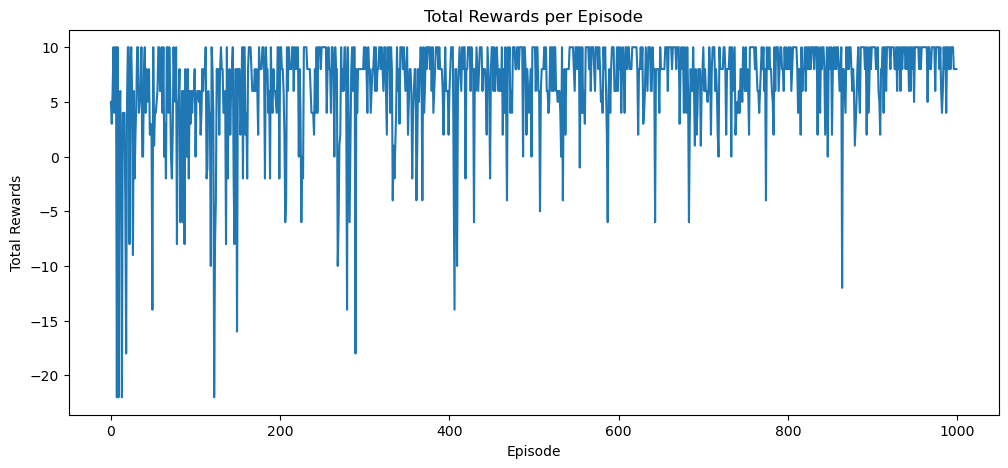

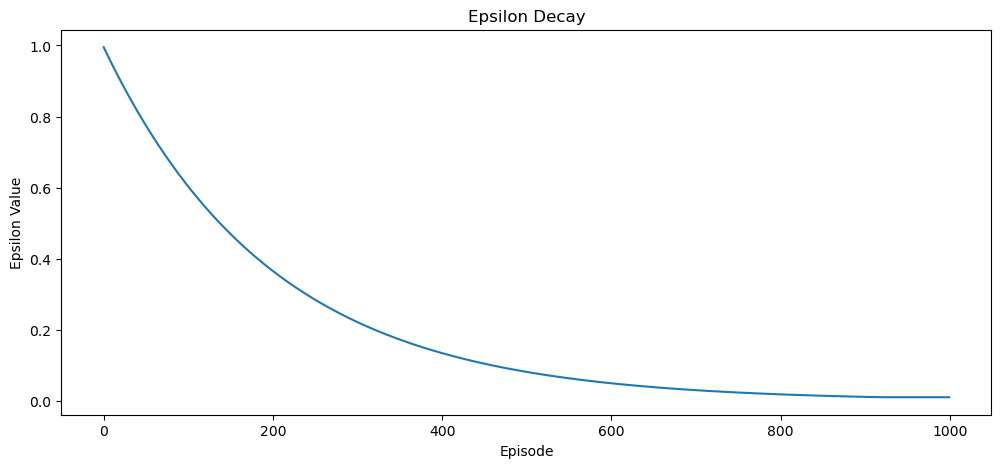

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 0.26203443  0.50936541  1.42463074  0.25353211]
 [-1.48629758  0.48611695  0.19489249  0.11391455]
 [ 0.37680973  0.37983507  0.55526899 -0.79867746]
 [ 0.1515098  -1.39109567  0.35096999  0.13844038]
 [ 0.33312766  0.38472722  0.21633476  1.54444872]
 [ 0.47840712  0.25376945  0.21146418  0.08244057]
 [ 0.83453845  0.33753502  0.24415371 -1.47708773]
 [ 0.31200109  0.22080552  0.          0.17932695]
 [ 0.25850858  0.11230548  0.14743316  0.13539263]
 [ 0.17827329  0.17833076  0.15529265  0.39428324]
 [ 0.          0.2511177   0.17799181  0.13624194]
 [ 0.          0.          0.          0.        ]]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random


def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(range(Q.shape[1]))
    else:
        return np.argmax(Q[state])


def sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon):
 
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
   
    rewards_per_episode = []
    epsilon_values = []

    for episode in range(total_episodes):
        
        state = env.reset()
       
        action = epsilon_greedy_policy(Q, state, epsilon)
        
        done = False
        total_rewards = 0
        
        while not done:
            
            next_state, reward, done, _ = env.step(action)
            if done:
                break
                
            
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            
           
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            
            
            state = next_state
            action = next_action
            
            total_rewards += reward
            
        
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
        
        rewards_per_episode.append(total_rewards)
        epsilon_values.append(epsilon)
    
    return Q, rewards_per_episode, epsilon_values


total_episodes = 1000
alpha = 0.1
gamma = 0.99 
epsilon = 1.0  
epsilon_decay = 0.995  
min_epsilon = 0.01  


env = MarathonEnvironment(environment_type='deterministic')


Q, rewards_per_episode, epsilon_values = sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon)


plt.figure(figsize=(12, 5))
plt.plot(rewards_per_episode)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()


print("Initial Q-table:")
print(np.zeros((env.observation_space.n, env.action_space.n))) 
print("\nTrained Q-table:")
print(Q)


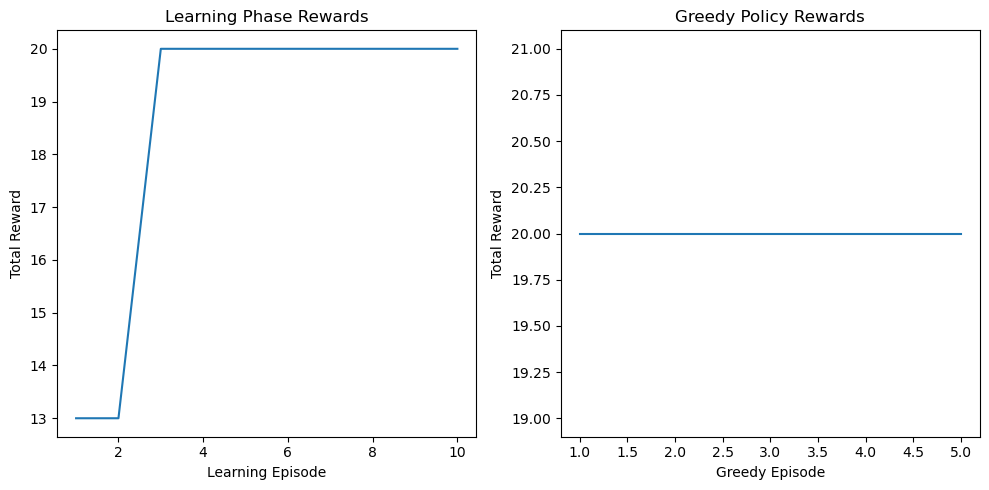

In [36]:

def modified_sarsa(env, total_learning_episodes, total_greedy_episodes, alpha, gamma, epsilon):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    total_rewards = []

   
    for episode in range(total_learning_episodes):
        state = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon)
        total_reward = 0

        while True:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)

           
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action
            total_reward += reward

            if done:
                break

        total_rewards.append(total_reward)

    greedy_rewards = []
    for episode in range(total_greedy_episodes):
        state = env.reset()
        total_reward = 0

        while True:
            action = np.argmax(Q[state]) 
            state, reward, done, _ = env.step(action)
            total_reward += reward

            if done:
                break

        greedy_rewards.append(total_reward)

    return Q, total_rewards, greedy_rewards

total_learning_episodes = 10
total_greedy_episodes = 5
alpha = 0.1
gamma = 0.99
epsilon = 0.1  

env = MarathonEnvironment(environment_type='deterministic')


Q, learning_rewards, greedy_rewards = modified_sarsa(env, total_learning_episodes, total_greedy_episodes, alpha, gamma, epsilon)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, total_learning_episodes + 1), learning_rewards)
plt.xlabel('Learning Episode')
plt.ylabel('Total Reward')
plt.title('Learning Phase Rewards')

plt.subplot(1, 2, 2)
plt.plot(range(1, total_greedy_episodes + 1), greedy_rewards)
plt.xlabel('Greedy Episode')
plt.ylabel('Total Reward')
plt.title('Greedy Policy Rewards')
plt.tight_layout()
plt.show()


Hyperparamter Tuning - Epsilon Decay Rate = 1 

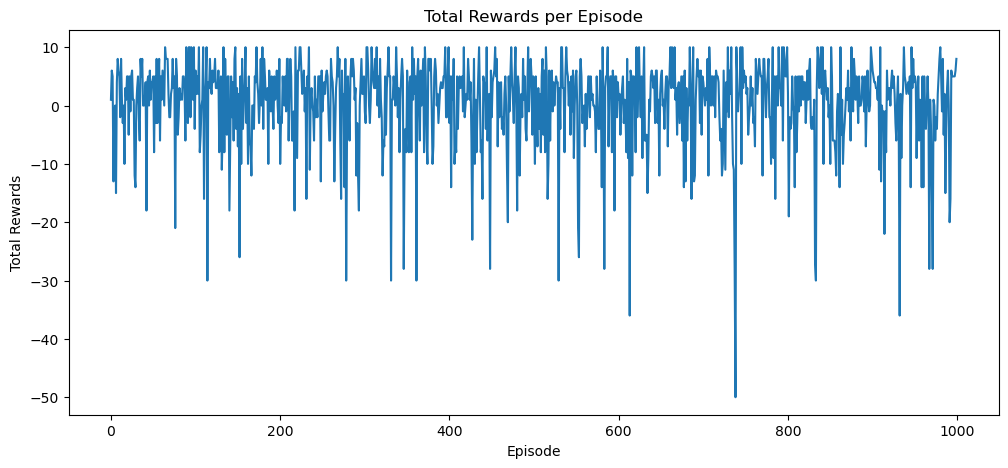

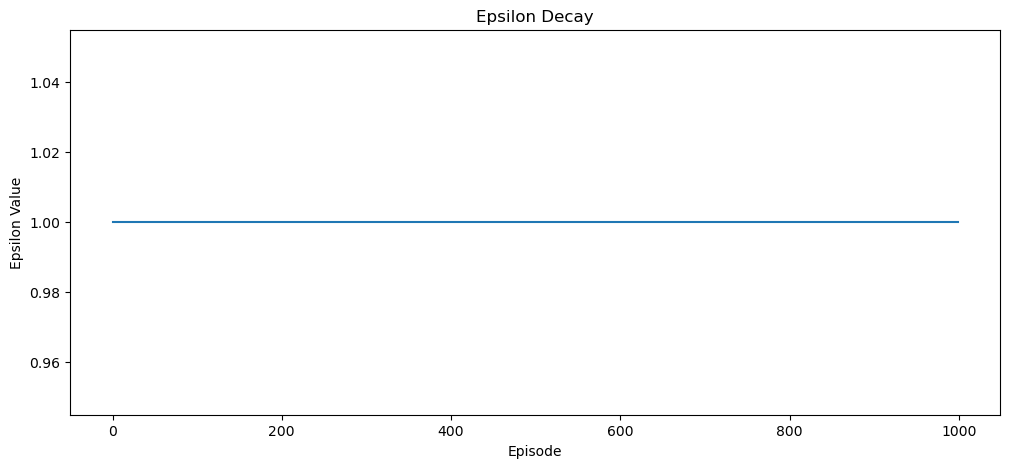

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[-0.77129558  0.6016398   1.98928913  0.49051333]
 [-3.12686365  0.38360646 -0.48860654 -0.99103417]
 [-1.17323789 -0.73758084 -1.20568777 -3.24404759]
 [-0.52464556 -3.20626803  1.0980498  -1.43480443]
 [-0.3588477  -0.03780298 -0.04495862  0.26689592]
 [-0.17489469  0.75332808 -0.19376942 -0.89584295]
 [ 2.39487646 -0.50293314 -0.33694793 -3.33733308]
 [-0.37304025 -0.69549925  0.         -0.93203887]
 [-0.22531132 -0.05361675 -0.01644727  0.03990643]
 [-0.3913305   0.02279999 -0.29775105 -0.51763151]
 [ 0.         -0.25368431 -0.44960295 -0.79513301]
 [ 0.          0.          0.          0.        ]]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(range(Q.shape[1]))
    else:
        return np.argmax(Q[state])

def sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon):
    
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    
    rewards_per_episode = []
    epsilon_values = []

    for episode in range(total_episodes):
       
        state = env.reset()
       
        action = epsilon_greedy_policy(Q, state, epsilon)
        
        done = False
        total_rewards = 0
        
        while not done:
            
            next_state, reward, done, _ = env.step(action)
            if done:
                break
                
         
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            
          
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            
            
            state = next_state
            action = next_action
            
       
            total_rewards += reward
            
    
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
        
        rewards_per_episode.append(total_rewards)
        epsilon_values.append(epsilon)
    
    return Q, rewards_per_episode, epsilon_values


total_episodes = 1000
alpha = 0.1  
gamma = 0.99  
epsilon = 1.0  
epsilon_decay = 0.9  
min_epsilon = 0.01  


env = MarathonEnvironment(environment_type='deterministic')


Q, rewards_per_episode, epsilon_values = sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon)

plt.figure(figsize=(12, 5))
plt.plot(rewards_per_episode)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()


print("Initial Q-table:")
print(np.zeros((env.observation_space.n, env.action_space.n)))  
print("\nTrained Q-table:")
print(Q)


Hyperparamter Tuning - Epsilon Decay Rate = 0.991

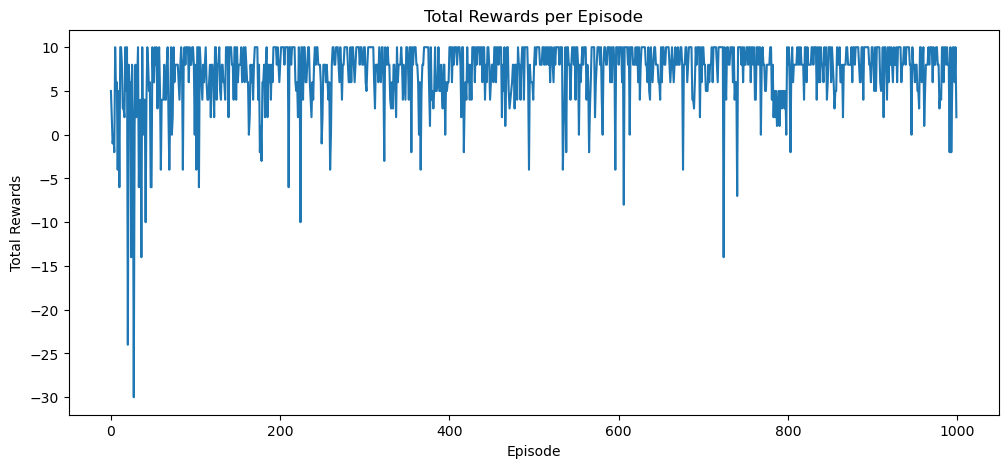

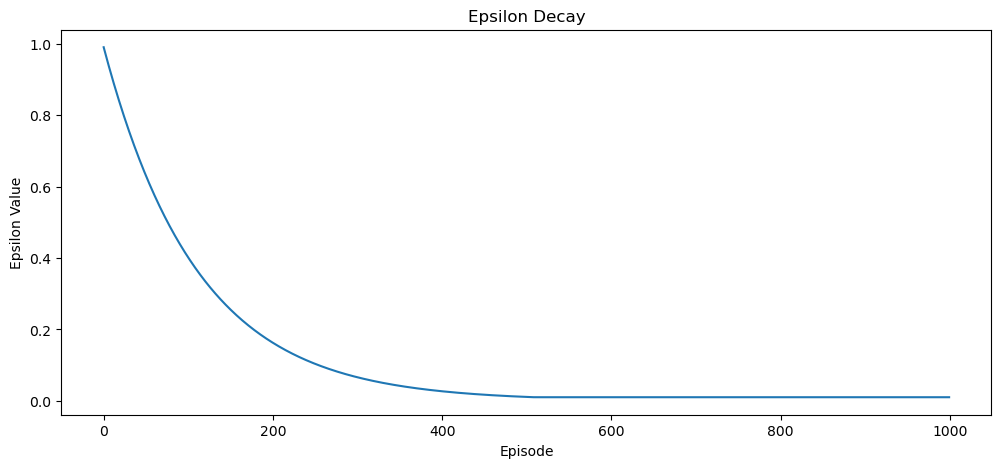

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 0.04285342  0.15980003  0.17331486  0.17340809]
 [-1.53898146  0.16071741  0.17324219  0.12013129]
 [ 0.26718328  0.26023555  0.43773178 -1.05912219]
 [ 0.14005274 -1.56926887  0.36137762  0.15738706]
 [ 0.17492802  0.17340418  0.17345003  0.17339636]
 [ 0.19586054  0.17351577  0.17364107  0.17365015]
 [ 0.26705068  0.24061006  0.26483041 -1.50687601]
 [ 0.19157458  0.09726104  0.          0.17674026]
 [ 0.17331066  0.17321033  0.17330167  0.1732452 ]
 [ 0.1733201   0.17310851  0.17342986  0.17261863]
 [ 0.          0.17302569  0.17293055  0.15904649]
 [ 0.          0.          0.          0.        ]]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(range(Q.shape[1]))
    else:
        return np.argmax(Q[state])

def sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon):
    
    Q = np.zeros((env.observation_space.n, env.action_space.n))
 
    rewards_per_episode = []
    epsilon_values = []

    for episode in range(total_episodes):
        
        state = env.reset()
       
        action = epsilon_greedy_policy(Q, state, epsilon)
        
        done = False
        total_rewards = 0
        
        while not done:
            
            next_state, reward, done, _ = env.step(action)
            if done:
                break
                
            
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            
            
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            
            
            state = next_state
            action = next_action
            
           
            total_rewards += reward
            
       
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
        
        rewards_per_episode.append(total_rewards)
        epsilon_values.append(epsilon)
    
    return Q, rewards_per_episode, epsilon_values


total_episodes = 1000
alpha = 0.1  
gamma = 0.99  
epsilon = 1.0  
epsilon_decay = 0.991 
min_epsilon = 0.01  

env = MarathonEnvironment(environment_type='deterministic')


Q, rewards_per_episode, epsilon_values = sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon)


plt.figure(figsize=(12, 5))
plt.plot(rewards_per_episode)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()

print("Initial Q-table:")
print(np.zeros((env.observation_space.n, env.action_space.n)))  
print("\nTrained Q-table:")
print(Q)


Hyperparamter Tuning -  Epsilon Decay Rate = 0.885

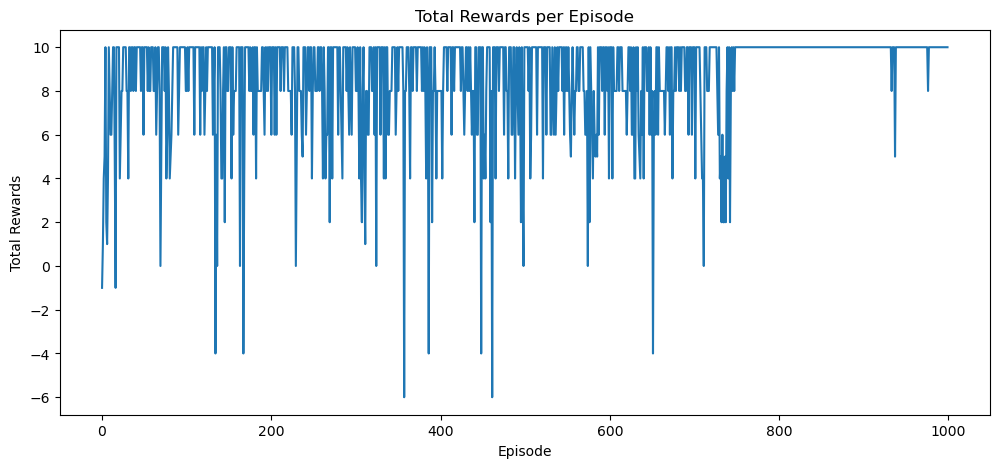

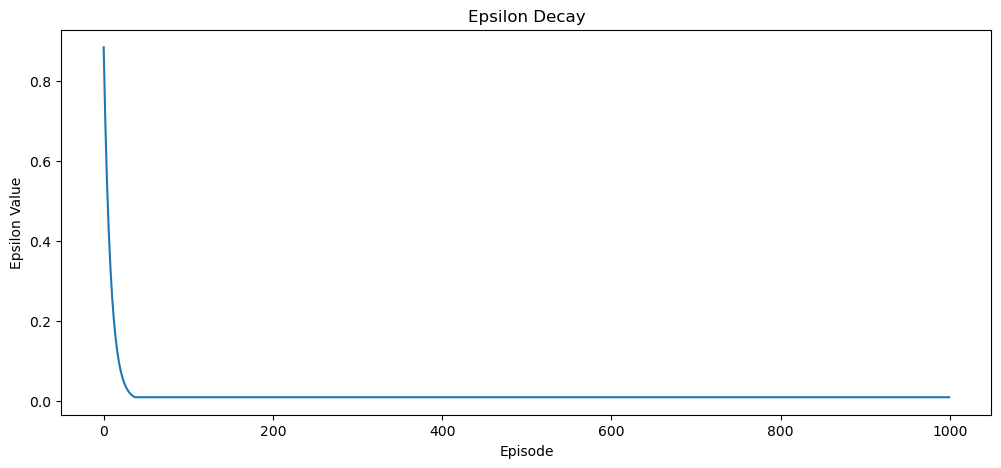

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 1.61011904e-01  2.43323144e-01  9.54494194e+00  4.16479408e-01]
 [-1.70489827e+00  9.98356466e-02  9.94998293e-01  3.14995653e-02]
 [ 5.61844512e-01  1.03254560e-02  1.24955827e-02 -1.29612206e+00]
 [-4.18348565e-02 -1.76152518e+00  2.11326863e+00  7.44810313e-02]
 [ 4.72402744e+00  7.23212150e-01  1.17566828e-01  2.61974691e+00]
 [ 4.88440290e+00  7.26479919e-02  1.70239004e-01  9.98202118e-02]
 [ 4.99999951e+00  9.33049531e-02  1.02588030e-01 -1.79046491e+00]
 [-1.07191226e-03 -2.65123302e-02  0.00000000e+00 -6.65086268e-02]
 [ 3.37089559e-01  7.25198134e-02  7.25645112e-02  7.25525680e-02]
 [ 6.88583082e-02  7.25618624e-02  7.25438453e-02  1.83690321e+00]
 [ 0.00000000e+00  2.13030469e-01  7.25799643e-02  7.15130273e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(range(Q.shape[1]))
    else:
        return np.argmax(Q[state])

def sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon):
    
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    rewards_per_episode = []
    epsilon_values = []

    for episode in range(total_episodes):
        
        state = env.reset()
       
        action = epsilon_greedy_policy(Q, state, epsilon)
        
        done = False
        total_rewards = 0
        
        while not done:
           
            next_state, reward, done, _ = env.step(action)
            if done:
                break
                
            
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            
            state = next_state
            action = next_action
            
            total_rewards += reward
            
        
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
        
        rewards_per_episode.append(total_rewards)
        epsilon_values.append(epsilon)
    
    return Q, rewards_per_episode, epsilon_values

total_episodes = 1000
alpha = 0.1  
gamma = 0.99  
epsilon = 1.0  
epsilon_decay = 0.885  
min_epsilon = 0.01  


env = MarathonEnvironment(environment_type='deterministic')


Q, rewards_per_episode, epsilon_values = sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon)


plt.figure(figsize=(12, 5))
plt.plot(rewards_per_episode)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()


print("Initial Q-table:")
print(np.zeros((env.observation_space.n, env.action_space.n))) 
print("\nTrained Q-table:")
print(Q)


Hyperparamter Tuning -  Discount  Factor = 0.96

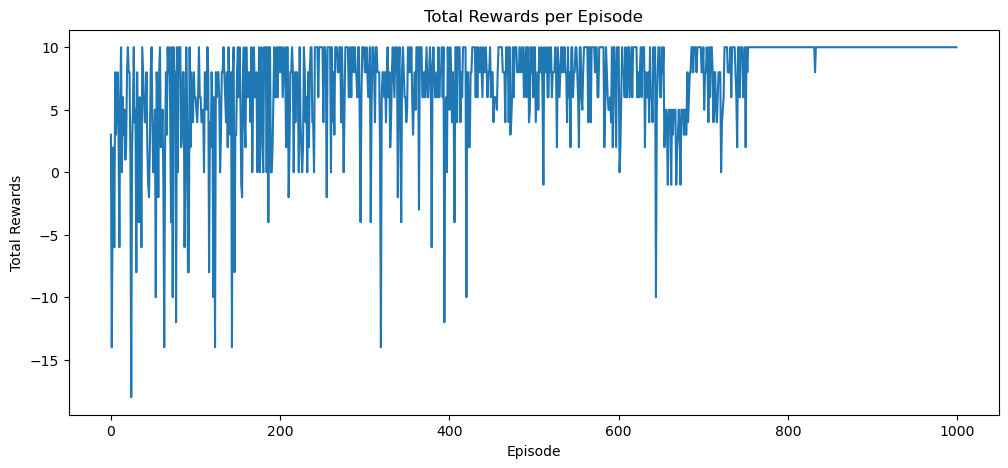

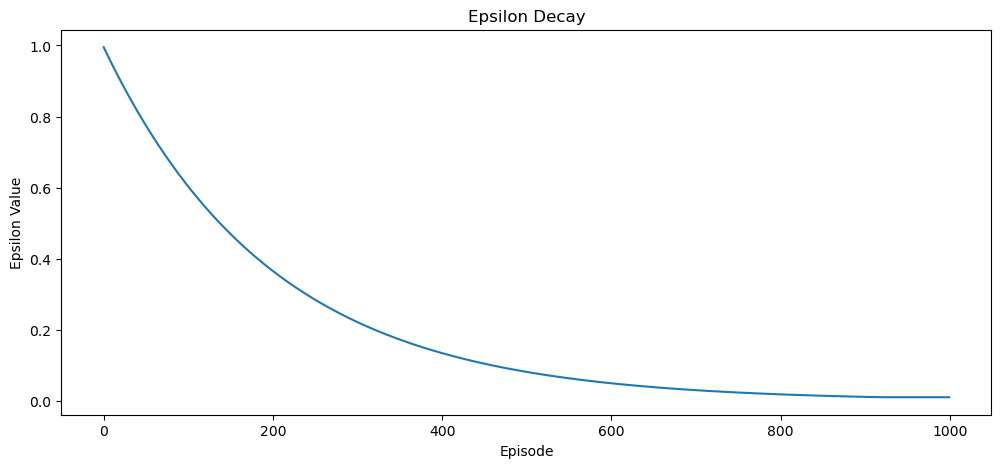

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 4.92923485e-02  1.57626137e+00  9.33018825e+00  5.24436504e-02]
 [-1.68685645e+00  1.91988106e+00  3.35734195e-02 -1.11742476e-01]
 [ 1.39171309e-01  1.52966843e-01  1.37908581e-01 -1.44560582e+00]
 [-2.44281194e-02 -1.75496276e+00  4.56176129e-01 -1.02044215e-03]
 [ 4.45167424e+00  5.24494645e-02  5.24016852e-02  5.25393892e-02]
 [ 4.67840668e+00  5.72728328e-02  9.33287586e-02 -1.17186956e-02]
 [ 4.99952902e+00  1.07006124e+00  9.84205988e-02 -1.79747085e+00]
 [-1.15893368e-02 -3.32277965e-02  0.00000000e+00 -1.36387841e-01]
 [ 5.32112750e-02  3.28524758e-02  3.54974828e-02  4.76398391e-01]
 [ 3.28261062e-02  3.28686253e-02  3.87772418e-02  1.81838082e+00]
 [ 0.00000000e+00  4.02986495e-01  3.25375209e-02 -6.65371712e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(range(Q.shape[1]))
    else:
        return np.argmax(Q[state])

def sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon):
    
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    rewards_per_episode = []
    epsilon_values = []

    for episode in range(total_episodes):
       
        state = env.reset()
        
        action = epsilon_greedy_policy(Q, state, epsilon)
        
        done = False
        total_rewards = 0
        
        while not done:
            
            next_state, reward, done, _ = env.step(action)
            if done:
                break
                
            
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            
            
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            
            
            state = next_state
            action = next_action
            
           
            total_rewards += reward
            
        
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
        
        rewards_per_episode.append(total_rewards)
        epsilon_values.append(epsilon)
    
    return Q, rewards_per_episode, epsilon_values


total_episodes = 1000
alpha = 0.1  
gamma = 0.96 
epsilon = 1.0 
epsilon_decay = 0.995  
min_epsilon = 0.01  


env = MarathonEnvironment(environment_type='deterministic')


Q, rewards_per_episode, epsilon_values = sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon)

plt.figure(figsize=(12, 5))
plt.plot(rewards_per_episode)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()


print("Initial Q-table:")
print(np.zeros((env.observation_space.n, env.action_space.n))) 
print("\nTrained Q-table:")
print(Q)


Hyperparamter Tuning -  Discount  Factor = 0.94

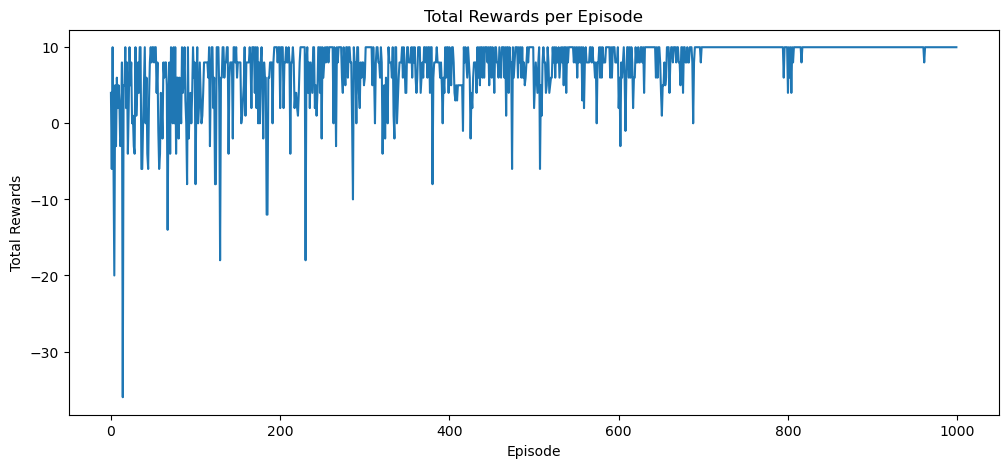

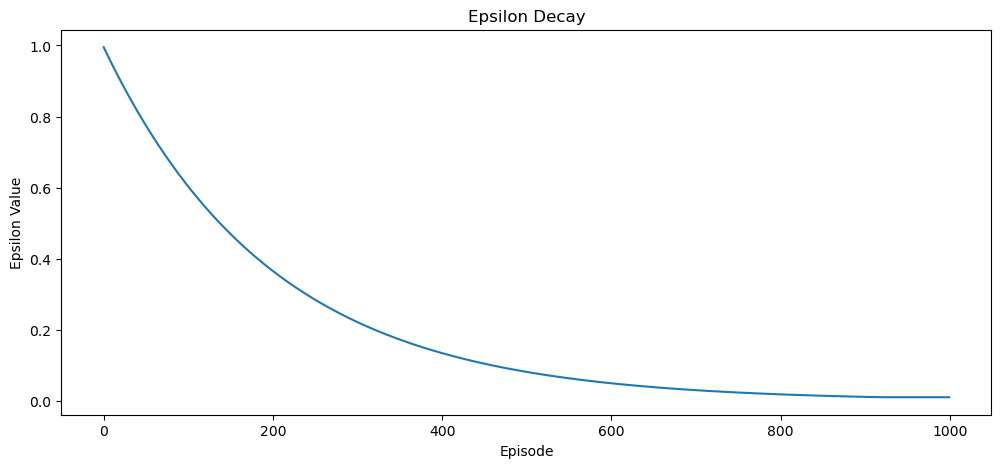

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 1.61946497e-01  1.64996362e-01  7.15703753e+00  1.56427265e-01]
 [-1.62462217e+00  1.81291607e-01  8.20621379e-02  8.90060142e-02]
 [ 2.57203050e-01  2.49291146e-01  6.31130328e-01 -1.40424984e+00]
 [-5.82240382e-03 -1.64285889e+00  4.12945814e-01 -6.14736614e-02]
 [ 3.32901564e+00  1.35491978e-01  1.35611393e-01  1.31070987e-01]
 [ 4.26397880e+00  1.40021194e-01  8.80436472e-02  1.82700235e-01]
 [ 4.91110132e+00  1.41508502e-01  6.42994183e-02 -1.56863377e+00]
 [-8.50104402e-03 -2.06439377e-02  0.00000000e+00 -1.72726084e-03]
 [ 8.78336103e-02  8.94070882e-02  6.14334755e-02  1.55344500e-01]
 [ 4.84001793e-02  2.37658280e-01  4.80559995e-02  4.70983326e-02]
 [ 0.00000000e+00  5.09959970e-02  4.82928282e-02 -6.70281690e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(range(Q.shape[1]))
    else:
        return np.argmax(Q[state])

def sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon):
   
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    
    rewards_per_episode = []
    epsilon_values = []

    for episode in range(total_episodes):
        
        state = env.reset()
        
        action = epsilon_greedy_policy(Q, state, epsilon)
        
        done = False
        total_rewards = 0
        
        while not done:
            
            next_state, reward, done, _ = env.step(action)
            if done:
                break
                
           
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            
            
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            
            
            state = next_state
            action = next_action
            
            
            total_rewards += reward
            
        
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
        
        rewards_per_episode.append(total_rewards)
        epsilon_values.append(epsilon)
    
    return Q, rewards_per_episode, epsilon_values

total_episodes = 1000
alpha = 0.1  
gamma = 0.94  
epsilon = 1.0  
epsilon_decay = 0.995  
min_epsilon = 0.01  


env = MarathonEnvironment(environment_type='deterministic')

Q, rewards_per_episode, epsilon_values = sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon)

plt.figure(figsize=(12, 5))
plt.plot(rewards_per_episode)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()

print("Initial Q-table:")
print(np.zeros((env.observation_space.n, env.action_space.n)))  
print("\nTrained Q-table:")
print(Q)


Hyperparamter Tuning -  Discount  Factor = 0.92

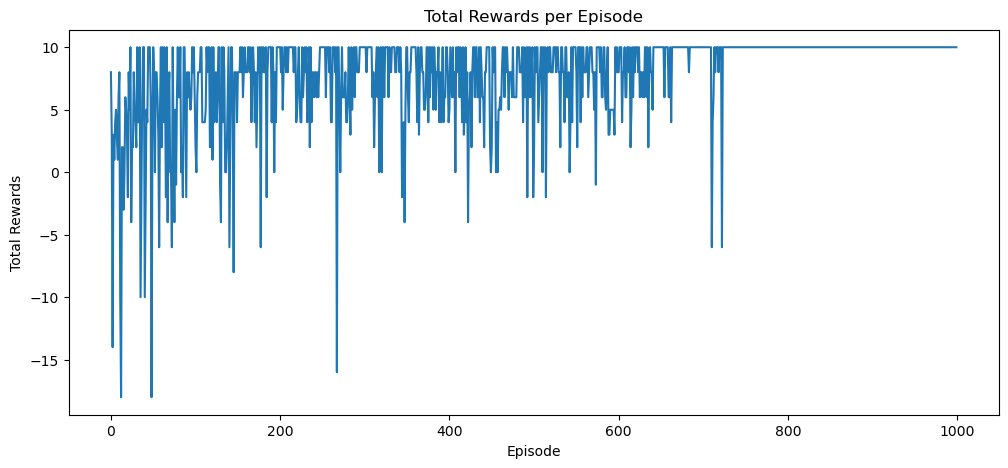

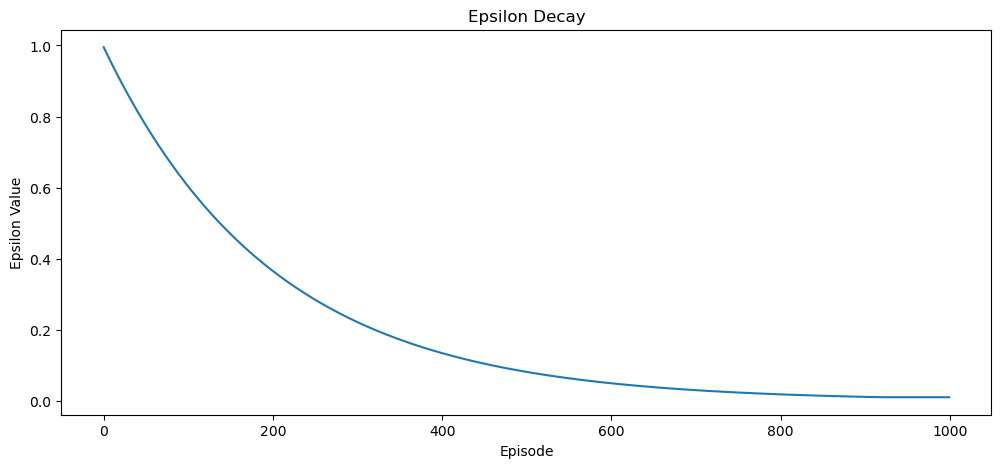

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[-6.95372492e-02  8.45557880e-01  8.88151137e+00  8.37970334e-01]
 [-1.62121892e+00  5.16899836e-02  5.23745940e-02  5.35033860e-02]
 [ 1.60298158e-01  1.45182610e-01  3.50334185e-01 -1.61384093e+00]
 [ 1.11038328e-02 -1.78341815e+00  7.58069316e-02  4.25169479e-02]
 [ 4.23073423e+00  4.01432247e-01  9.68095419e-02  7.18891658e-01]
 [ 4.59983246e+00  2.36262155e-02  2.36322329e-02 -9.71218847e-02]
 [ 4.99999994e+00  4.67614574e-01  6.26245011e-02 -1.52832984e+00]
 [-2.17158223e-03 -2.29408118e-02  0.00000000e+00 -1.05362662e-02]
 [ 2.32864833e-02  2.32827389e-02  2.30315905e-02  8.81694582e-01]
 [ 2.32593301e-02  2.31629550e-02  2.32736883e-02  2.31693593e-02]
 [ 0.00000000e+00  2.30584892e-02  2.31949955e-02  1.60096312e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+

In [22]:

import numpy as np
import matplotlib.pyplot as plt
import random

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(range(Q.shape[1]))
    else:
        return np.argmax(Q[state])

def sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon):

    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    
    rewards_per_episode = []
    epsilon_values = []

    for episode in range(total_episodes):
        
        state = env.reset()
        
        action = epsilon_greedy_policy(Q, state, epsilon)
        
        done = False
        total_rewards = 0
        
        while not done:
            
            next_state, reward, done, _ = env.step(action)
            if done:
                break
                
            
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            
            
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            
            
            state = next_state
            action = next_action
            
            
            total_rewards += reward
            
        
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
        
        rewards_per_episode.append(total_rewards)
        epsilon_values.append(epsilon)
    
    return Q, rewards_per_episode, epsilon_values


total_episodes = 1000
alpha = 0.1  
gamma = 0.92  
epsilon = 1.0  
epsilon_decay = 0.995  
min_epsilon = 0.01  

env = MarathonEnvironment(environment_type='deterministic')

Q, rewards_per_episode, epsilon_values = sarsa(env, total_episodes, alpha, gamma, epsilon, epsilon_decay, min_epsilon)

plt.figure(figsize=(12, 5))
plt.plot(rewards_per_episode)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()

print("Initial Q-table:")
print(np.zeros((env.observation_space.n, env.action_space.n)))
print("\nTrained Q-table:")
print(Q)
